In [23]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ładowanie Danych

In [24]:
import os
import cv2

def load_images_and_labels(data_dir, set_type):
    images = []
    labels = []

    # Ścieżki do folderów obrazów i etykiet
    images_path = os.path.join(data_dir, set_type, 'images')
    labels_path = os.path.join(data_dir, set_type, 'labels')

    # Iteracja przez wszystkie pliki w folderze z obrazami
    for filename in os.listdir(images_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Ścieżka do etykiety
            label_filename = filename.replace('.jpg', '.txt').replace('.png', '.txt')
            label_fullpath = os.path.join(labels_path, label_filename)

            # Sprawdzenie czy istnieje odpowiadający plik etykiety
            if os.path.exists(label_fullpath):
                with open(label_fullpath, 'r') as f:
                    label_data = f.readlines()

                    # Zakładamy, że pierwsza wartość w pliku etykiety to informacja o skoliozie
                    if label_data:
                        first_value = int(label_data[0].strip().split()[0])
                        
                        # Wczytanie obrazu tylko jeśli istnieje etykieta
                        img = cv2.imread(os.path.join(images_path, filename))
                        images.append(img)
                        labels.append(first_value) 
            else:
                print(f"Brak etykiety dla obrazu {filename}, pomijam...")

    return images, labels

data_dir = 'Datasets/X-Ray/scoliosis'
train_images, train_labels = load_images_and_labels(data_dir, 'train')
valid_images, valid_labels = load_images_and_labels(data_dir, 'valid')
test_images, test_labels = load_images_and_labels(data_dir, 'test')

print(f'Train images: {len(train_images)}, Train labels: {len(train_labels)}')
print(f'Train shape {train_images[0].shape}')
print(f'Valid images: {len(valid_images)}, Valid labels: {len(valid_labels)}')
print(f'Test images: {len(test_images)}, Test labels: {len(test_labels)}')

train_images = np.array(train_images).astype(np.float32)
train_labels = np.array(train_labels).astype(np.float32)
test_images = np.array(test_images).astype(np.float32)
test_labels = np.array(test_labels).astype(np.float32)
valid_images = np.array(valid_images).astype(np.float32)
valid_labels = np.array(valid_labels).astype(np.float32)

train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

Train images: 862, Train labels: 862
Train shape (120, 60, 3)
Train labels content [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

[[[0.00784314 0.00784314 0.00784314]
  [0.         0.         0.        ]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.03529412 0.03529412 0.03529412]
  [0.         0.         0.        ]]

 [[0.01176471 0.01176471 0.01176471]
  [0.00392157 0.00392157 0.00392157]
  [0.05490196 0.05490196 0.05490196]
  ...
  [0.01568628 0.01568628 0.01568628]
  [0.07058824 0.07058824 0.07058824]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.07450981 0.07450981 0.07450981]
  ...
  [0.07058824 0.07058824 0.07058824]
  [0.11372549 0.11372549 0.11372549]
  [0.00392157 0.00392157 0.00392157]]

 ...

 [[0.05490196 0.05490196 0.05490196]
  [0.31764707 0.31764707 0.31764707]
  [0.5529412  0.5529412  0.5529412 ]
  ...
  [0.12156863 0.12156863 0.12156863]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.06666667 0.06666667 0.06666667]


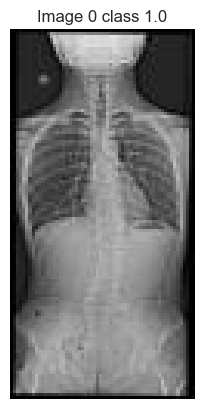

[[[0.00784314 0.00784314 0.00784314]
  [0.         0.         0.        ]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.03529412 0.03529412 0.03529412]
  [0.         0.         0.        ]]

 [[0.01176471 0.01176471 0.01176471]
  [0.00392157 0.00392157 0.00392157]
  [0.05490196 0.05490196 0.05490196]
  ...
  [0.01568628 0.01568628 0.01568628]
  [0.07058824 0.07058824 0.07058824]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.07450981 0.07450981 0.07450981]
  ...
  [0.07058824 0.07058824 0.07058824]
  [0.11372549 0.11372549 0.11372549]
  [0.00392157 0.00392157 0.00392157]]

 ...

 [[0.05490196 0.05490196 0.05490196]
  [0.31764707 0.31764707 0.31764707]
  [0.5529412  0.5529412  0.5529412 ]
  ...
  [0.12156863 0.12156863 0.12156863]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.06666667 0.06666667 0.06666667]


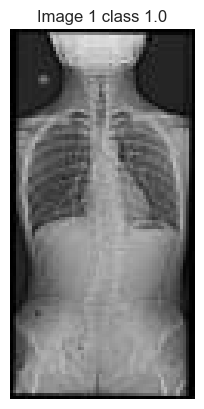

In [25]:
import cv2
for i in range(0, 2):
    print(train_images[0])
    plt.imshow(train_images[i])
    plt.title(f'Image {i} class {train_labels[i]}') 
    plt.axis('off')  
    plt.show()  

# Tworzenie Modelu

In [26]:
import tensorflow
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [27]:
model = Sequential([
    Conv2D(120, (3, 3), activation='relu', input_shape=(120, 60, 3)),  # Użycie 3 kanałów
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(48, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

C:\Users\jakub\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# głupi fix na dziurawy dataset
history = model.fit(train_images, train_labels, epochs=10, validation_data=(valid_images, valid_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 623ms/step - accuracy: 0.8367 - loss: 0.4111 - val_accuracy: 0.8800 - val_loss: 0.2263
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 509ms/step - accuracy: 0.8596 - loss: 0.2765 - val_accuracy: 0.8900 - val_loss: 0.1974
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 418ms/step - accuracy: 0.8973 - loss: 0.2309 - val_accuracy: 0.9700 - val_loss: 0.2745
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.9051 - loss: 0.2506 - val_accuracy: 0.9100 - val_loss: 0.1720
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 372ms/step - accuracy: 0.9096 - loss: 0.2624 - val_accuracy: 0.9500 - val_loss: 0.1783
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.9259 - loss: 0.2297 - val_accuracy: 0.9500 - val_loss: 0.1555
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.9442 - loss: 0.1876 - val_accuracy: 0.9800 - val_loss: 0.1659
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.9436 - loss: 0.2052 - val_accu

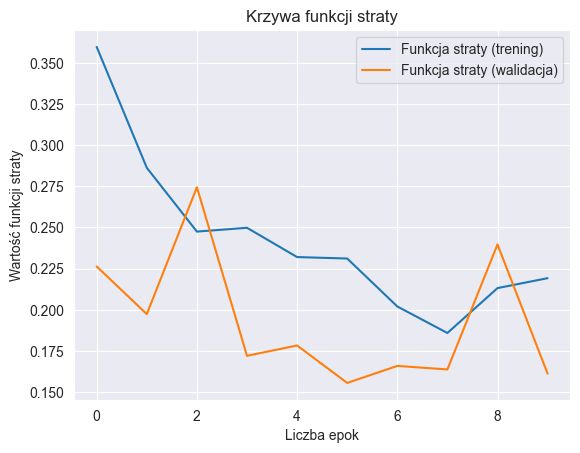

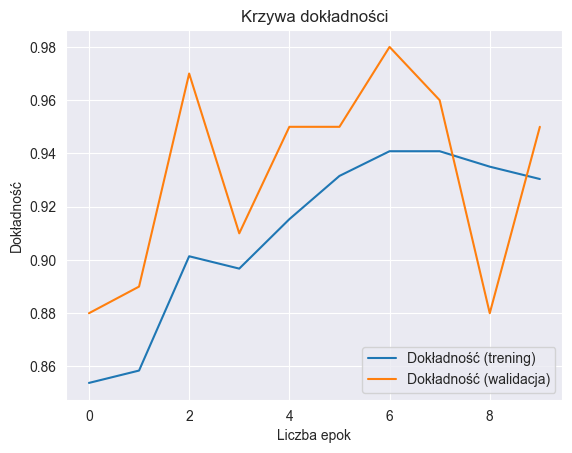

In [29]:
# Krzywye uczenia
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

In [30]:
print(test_images.shape)
pred_label = model.predict(test_images)

(100, 120, 60, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


In [31]:
pred_label

array([[0.7970369 ],
       [0.73778415],
       [0.91987634],
       [0.89460516],
       [0.90618896],
       [0.9367658 ],
       [0.99414736],
       [0.8617411 ],
       [0.91772485],
       [0.9531938 ],
       [0.9835022 ],
       [0.9840081 ],
       [0.9488221 ],
       [0.8802402 ],
       [0.5772195 ],
       [0.9929283 ],
       [0.9747915 ],
       [0.9063982 ],
       [0.974078  ],
       [0.9879172 ],
       [0.49760583],
       [0.9021511 ],
       [0.97754467],
       [0.985039  ],
       [0.99374473],
       [0.7354077 ],
       [0.8795937 ],
       [0.9216153 ],
       [0.9359886 ],
       [0.99609727],
       [0.96965206],
       [0.99208456],
       [0.94158155],
       [0.997207  ],
       [0.9855509 ],
       [0.9687064 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.4731894 ],
       [0.6083748 ],
       [0.473

In [32]:
pred_label = np.where(pred_label > 0.5, 1, 0)
pred_label

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
    

[26 59]


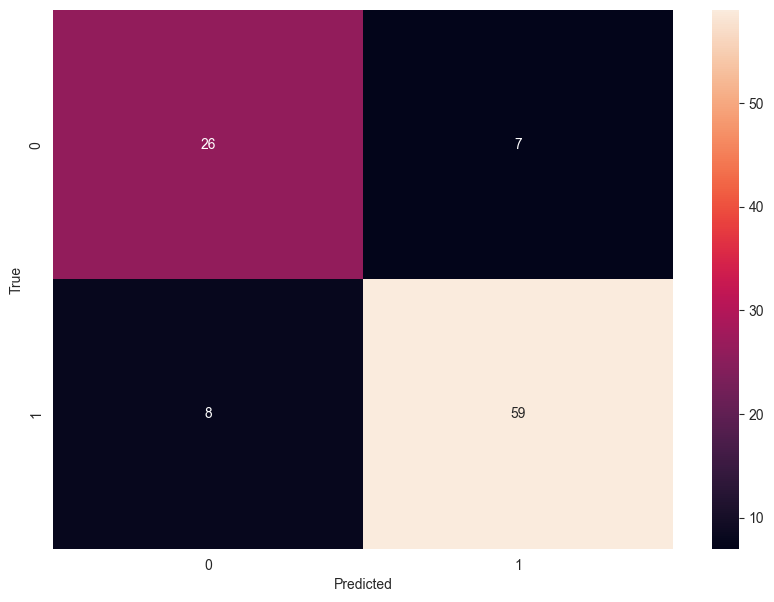

In [33]:
# Obliczenie confusion matrix
cm = confusion_matrix(pred_label, test_labels)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(2)], columns = [i for i in range(2)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
img = cv2.imread('Datasets/X-Ray/scoliosis/new_images/test.jpg')
my_img = []
my_img.append(img)
my_img = np.array(my_img).astype(np.float32)
my_img = my_img / 255.0
my_img.shape

(1,)

In [35]:
prot_lab = model.predict(my_img)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
prot_lab

In [ ]:
plt.imshow(my_img[0])
plt.title(f'Image {0} class {prot_lab}') 
plt.axis('off')  
plt.show()  

In [ ]:
img = cv2.imread('Datasets/X-Ray/scoliosis/new_images/healthy.jpg')
my_img = []
my_img.append(img)
my_img = np.array(my_img).astype(np.float32)
my_img = my_img / 255.0
my_img.shape

In [ ]:
prot_lab = model.predict(my_img)
prot_lab

In [ ]:
plt.imshow(my_img[0])
plt.title(f'Image {0} class {prot_lab}') 
plt.axis('off')  
plt.show()  